In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('file:///C:/Users/SHAKIR/OneDrive/Desktop/DATASET/train_ctrUa4K%20(1).csv')
test=pd.read_csv('file:///C:/Users/SHAKIR/OneDrive/Desktop/DATASET/test_lAUu6dG%20(2).csv')
sample=pd.read_csv(r'file:///C:\Users\SHAKIR\Desktop\New%20folder%20(2)\sample_submission_49d68Cx%20(2).csv')

In [3]:
# First 5 rows of the train data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#first 5 rows of the test data
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
# shape of the train data set
train.shape

(614, 13)

In [6]:
train.columns #columns of the train dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.info()  #basic information about train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# checking for null values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

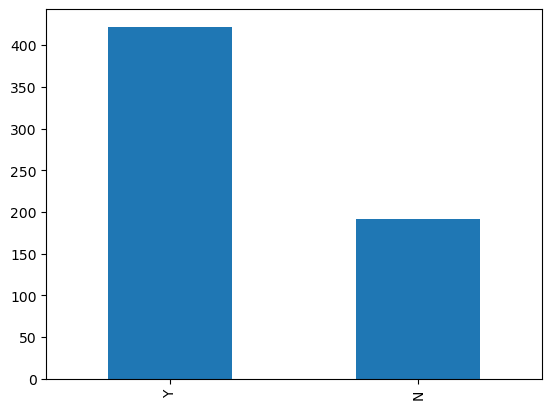

In [12]:
train['Loan_Status'].value_counts().plot.bar()
plt.show()

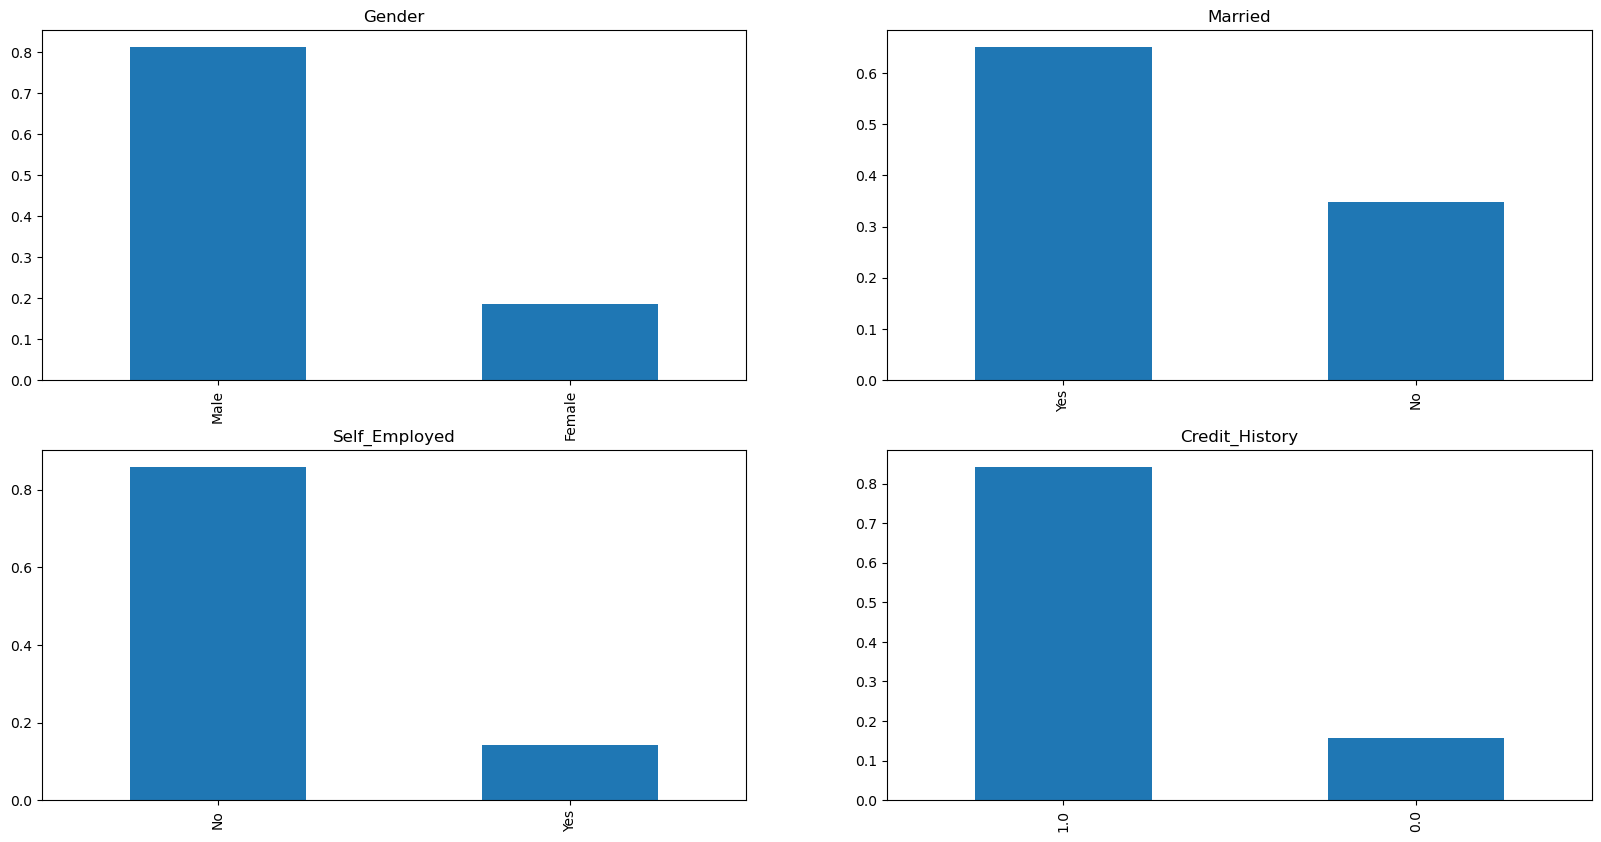

In [13]:
# Independent variable(Categorical) 
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(title='Credit_History')
plt.show()

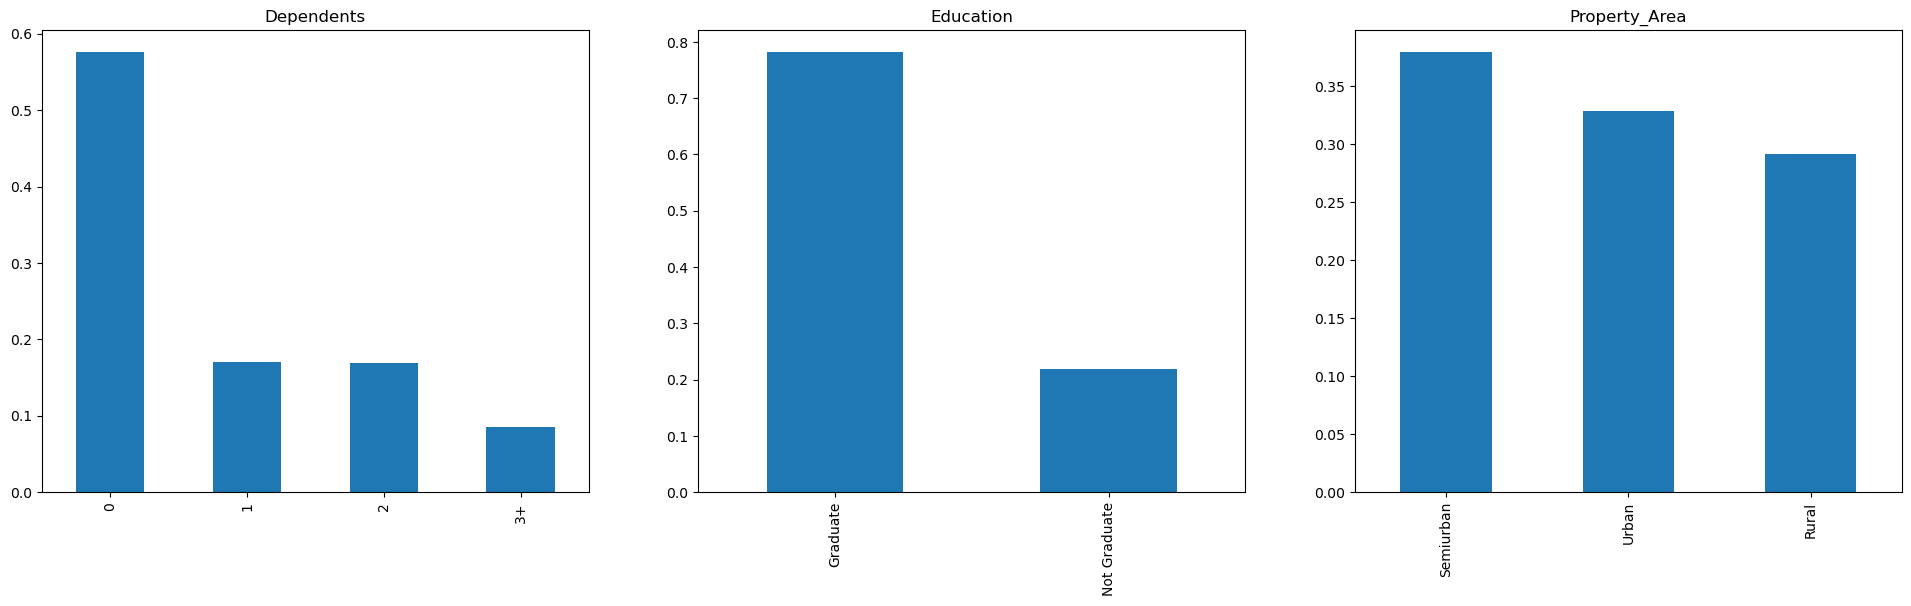

In [14]:
# Independent variable (Ordinal)
plt.figure(2)
plt.subplot(131)
train['Dependents'].value_counts('normalize = True').plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts('normalize = True').plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts('normalize=True').plot.bar(title='Property_Area')
plt.show()

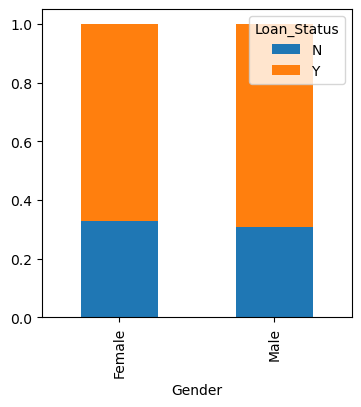

In [15]:
# Gender Vs Loan status
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

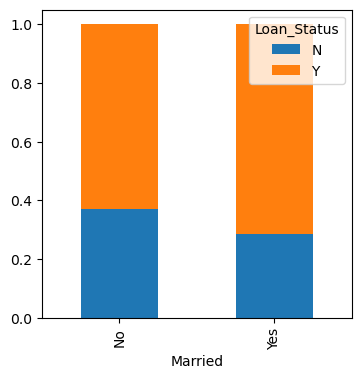

In [16]:
#married vs Loan_status
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


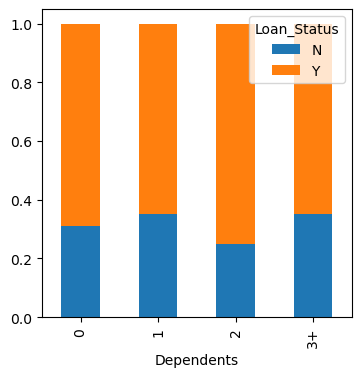

In [17]:
#Dependents Vs Loan_status
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

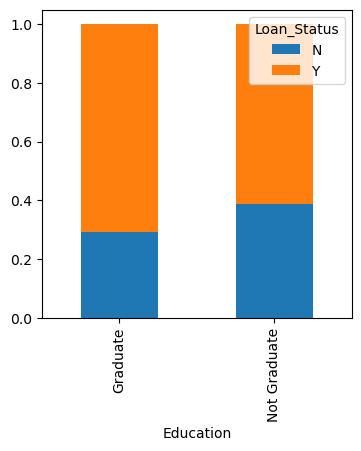

In [18]:
#Education vs Loan_status
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

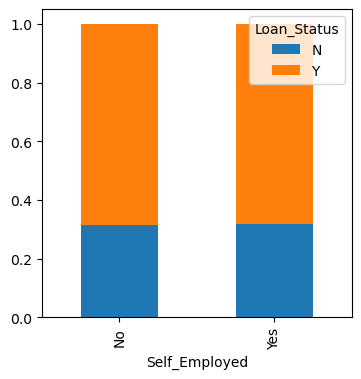

In [19]:
#Self_employed vs Loan_status
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

<AxesSubplot:>

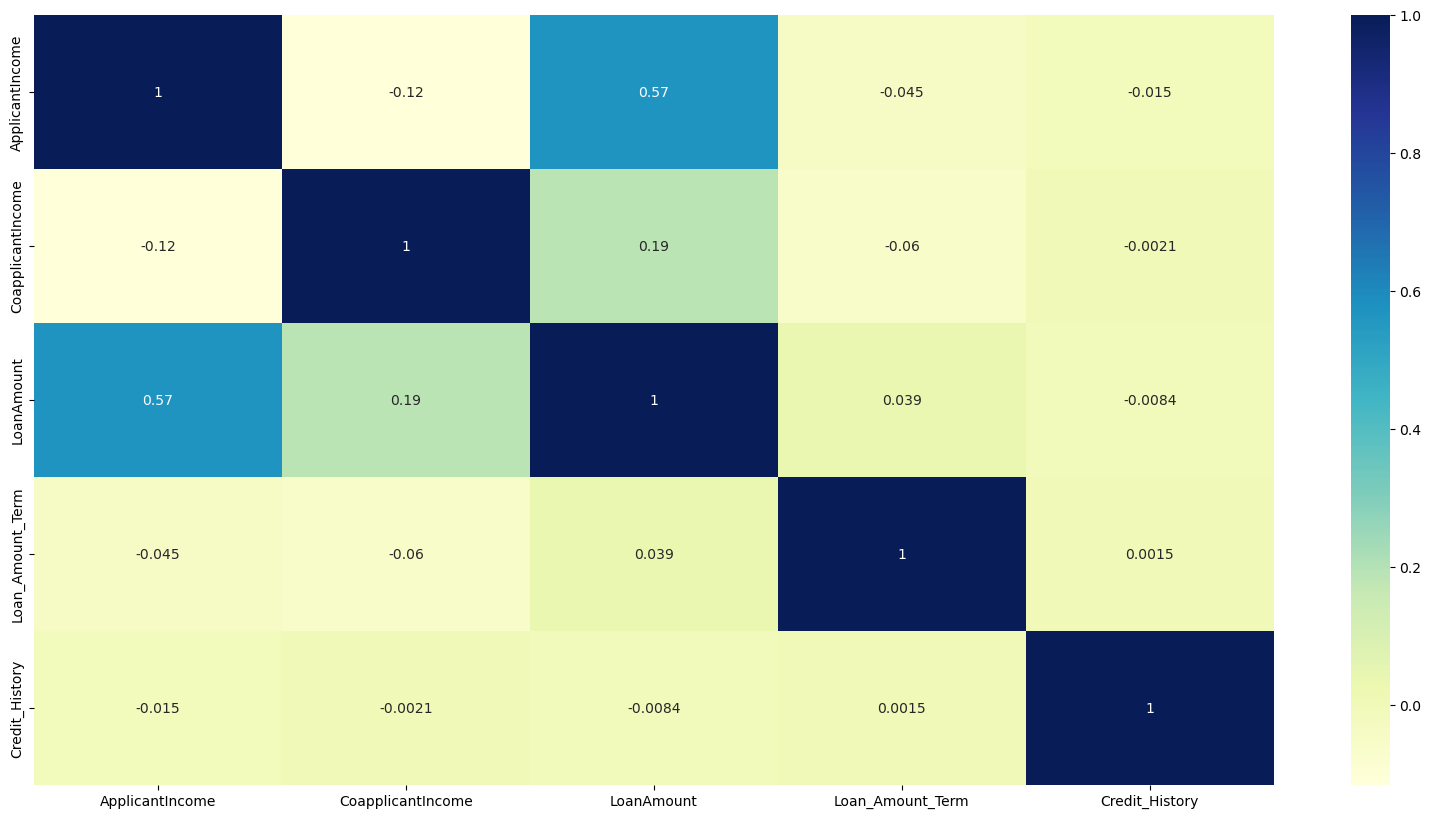

In [20]:
corrmatrix = train.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,cmap = 'YlGnBu')

In [21]:
#checking for null values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

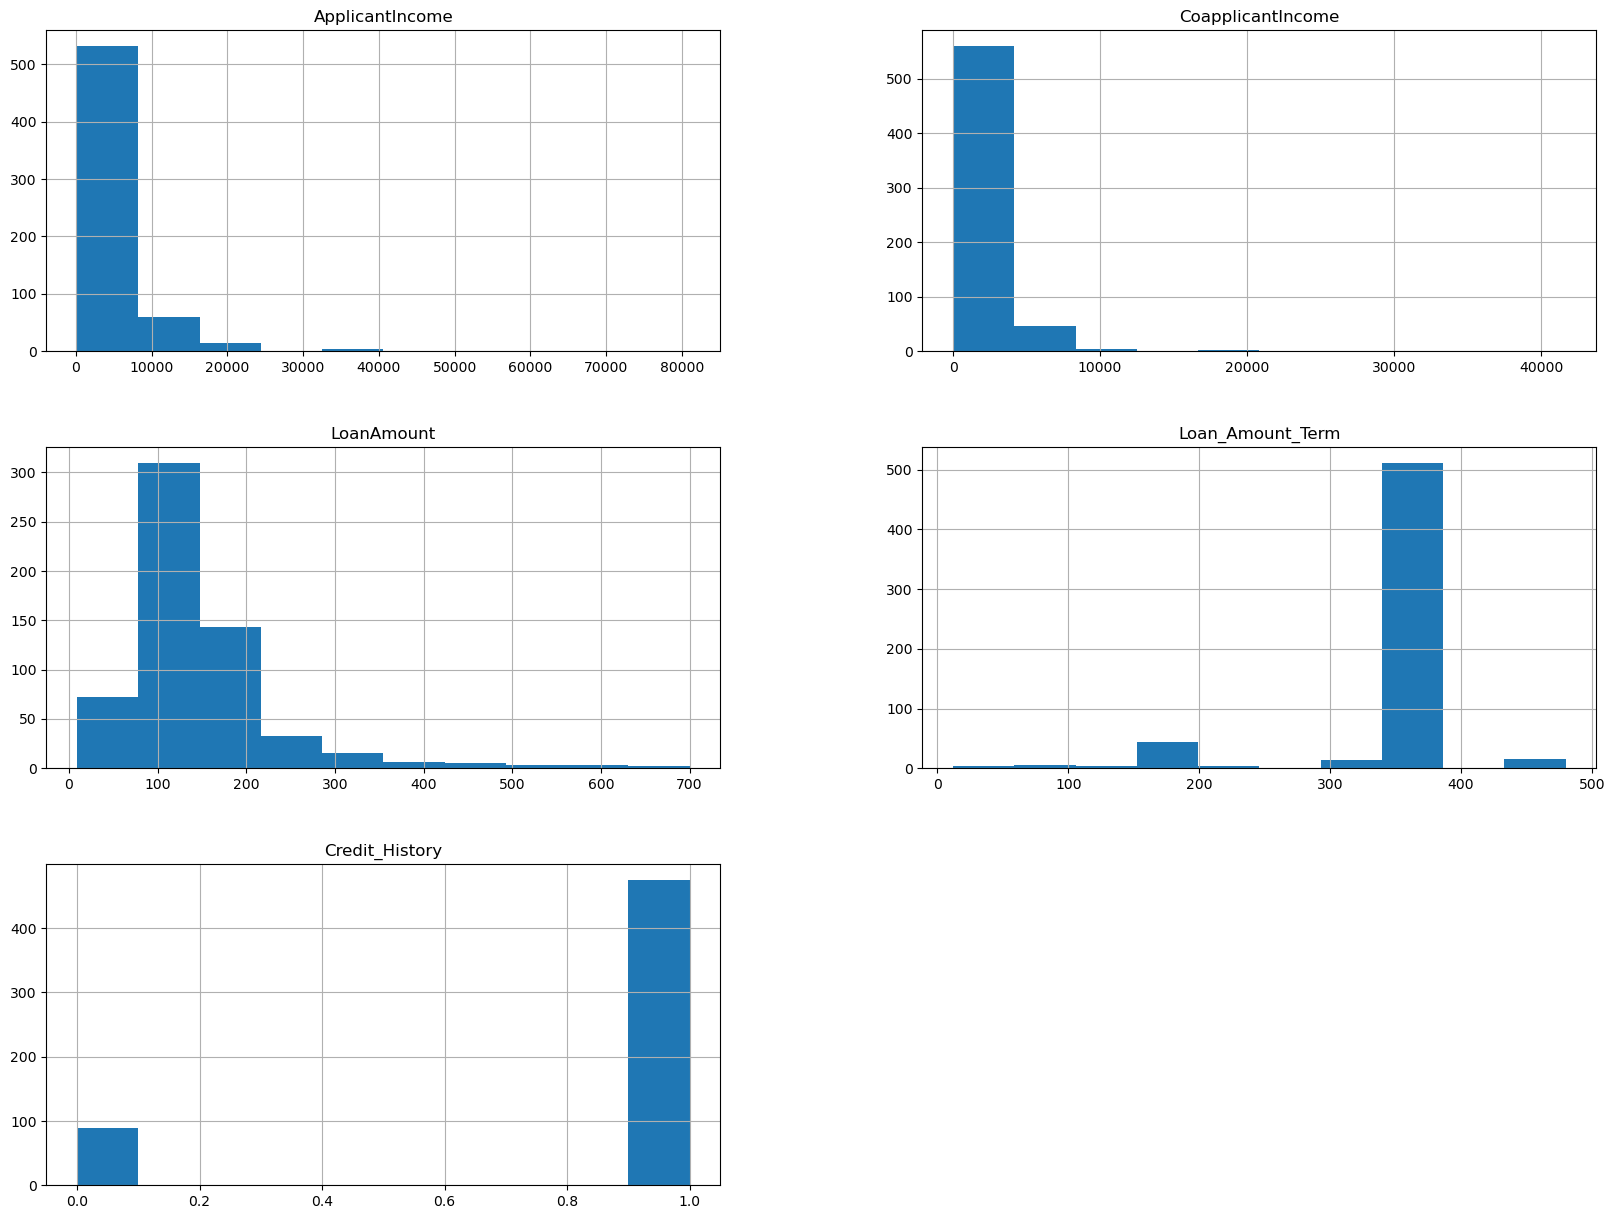

In [22]:
freqgraph=train.select_dtypes(include=["float",'int'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [23]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())# Filling null values with median
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median()) 

In [24]:
for i in ['Gender', 'Dependents','Self_Employed','Credit_History','Married']:# filling the missing values with mode
    train[i] = train[i].fillna(train[i].mode()[0])

In [25]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


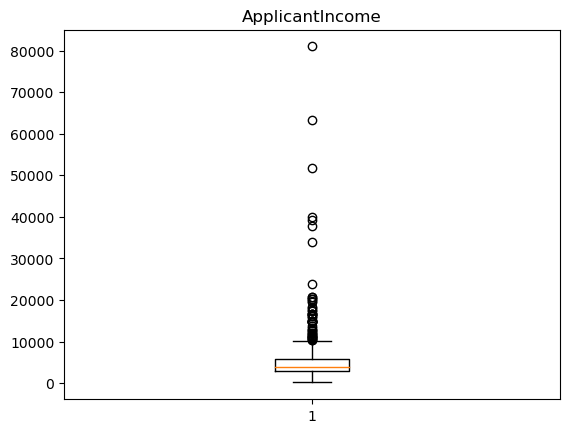

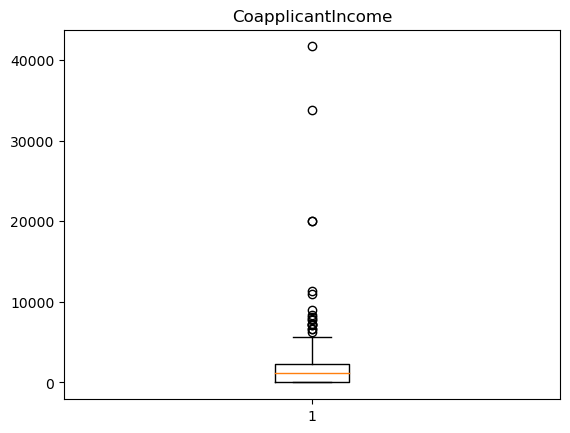

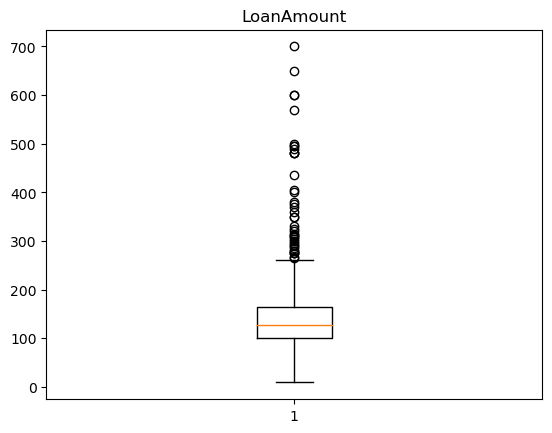

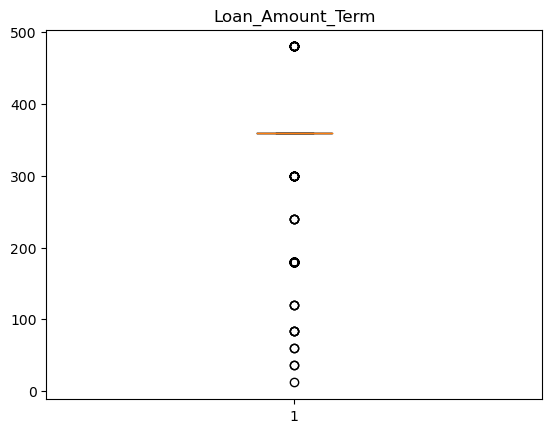

In [26]:
# Outlier detection
#outliers in numerical features
numerical=[features for features in train.columns if train[features].dtypes!="O" and features !='Loan_Status' and  features !='Credit_History']
print(numerical)
for features in numerical:
        plt.boxplot(train[features])
        plt.title(features)
        plt.show()
        

In [27]:
categorical_features=[features for features in train.columns if train[features].dtypes=="O" and features !='Loan_Status']
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [28]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']: #skewness
    data_skew=train[i].skew()
    print(data_skew)

6.539513113994625
7.491531216657306
2.743052748820892
-2.4021122563890396


In [29]:
data=train.drop('Loan_ID',axis=1)# dropping the Loan Id column withall unique value sinc

In [30]:
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()

In [31]:
for i in ['Self_Employed','Loan_Status','Dependents','Self_Employed','Education','Married','Gender','Property_Area']:
    data[i]=le.fit_transform(data[i])

In [32]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [34]:
data1=data.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis=1)
data2=data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]

In [35]:
data1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [36]:
from sklearn.preprocessing import StandardScaler
stdsclr=StandardScaler()
data3=stdsclr.fit_transform(data1)

In [37]:
data3

array([[ 0.07299082, -0.55448733, -0.21124125,  0.2732313 ,  0.41173269],
       [-0.13441195, -0.03873155, -0.21124125,  0.2732313 ,  0.41173269],
       [-0.39374734, -0.55448733, -0.94899647,  0.2732313 ,  0.41173269],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847,  0.2732313 ,  0.41173269],
       [ 0.35706382, -0.55448733,  0.49081614,  0.2732313 ,  0.41173269],
       [-0.13441195, -0.55448733, -0.15174486,  0.2732313 , -2.42876026]])

In [38]:
data3=pd.DataFrame(data3,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

In [39]:
#concatenating target & encoded columns with scaled columns.
data3 =pd.concat([data2,data3], axis =1)

In [40]:
data3.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,0.072991,-0.554487,-0.211241,0.273231,0.411733
1,1,1,1,0,0,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733
2,1,1,0,0,1,2,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733
3,1,1,0,1,0,2,1,-0.462062,0.251980,-0.306435,0.273231,0.411733
4,1,0,0,0,0,2,1,0.097728,-0.554487,-0.056551,0.273231,0.411733


In [41]:
data3.shape

(614, 12)

In [42]:
# Splitting features and target
x=data3.drop('Loan_Status',axis=1)
y=data3['Loan_Status']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
model_logr = logr.fit (x_train ,y_train)
y_pred_logr = model_logr.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [46]:
print(confusion_matrix(y_test,y_pred_logr))
print("accuracy_score is",accuracy_score(y_test, y_pred_logr))

[[18 25]
 [ 1 79]]
accuracy_score is 0.7886178861788617


In [47]:
from sklearn.neighbors import KNeighborsClassifier
metric_k  = []
neighbors = np.arange(3, 15)


for k in neighbors:
    knn       =  KNeighborsClassifier(n_neighbors = k)
    knn_model =  knn.fit(x_train,y_train)
    knn_pred  =  knn_model.predict(x_test)
    knn_acc   =  accuracy_score(y_test,knn_pred)
    metric_k.append(knn_acc)

C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

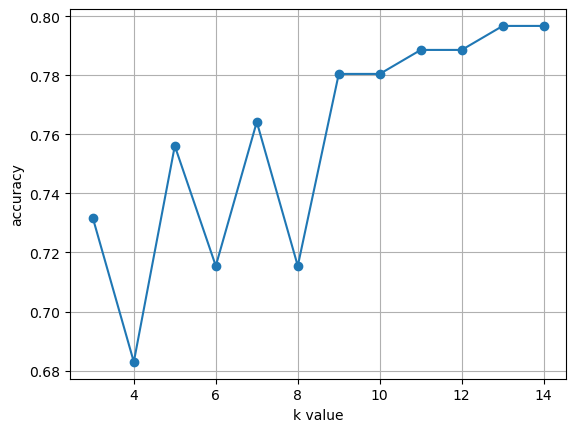

In [48]:
#plotting graph

plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [49]:
knn_9       =  KNeighborsClassifier(n_neighbors = 9)
knn_model_9 =  knn_9.fit(x_train,y_train)
knn_pred_9  =  knn_model_9.predict(x_test)
knn_pred_9

C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [50]:
confusion_matrix(y_test, knn_pred_9)

array([[18, 25],
       [ 2, 78]], dtype=int64)

In [51]:
accuracy_score(y_test, knn_pred_9)

0.7804878048780488

In [52]:
from sklearn.svm import SVC
svm_clf= SVC(kernel='linear')
svm_model=svm_clf.fit(x_train,y_train)
y_pred_svm=svm_model.predict(x_test)

In [53]:
confusion_matrix(y_test,y_pred_svm)

array([[18, 25],
       [ 1, 79]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred_svm)

0.7886178861788617

In [55]:
from sklearn.svm import SVC
svm_clf1= SVC(kernel='rbf')
svm_model1=svm_clf1.fit(x_train,y_train)
y_pred_svm1=svm_model1.predict(x_test)

In [56]:
confusion_matrix(y_test,y_pred_svm1)

array([[18, 25],
       [ 2, 78]], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred_svm1)

0.7804878048780488

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_model=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)

In [59]:
confusion_matrix(y_test,y_pred_dt)

array([[22, 21],
       [16, 64]], dtype=int64)

In [60]:
accuracy_score(y_test,y_pred_dt)


0.6991869918699187

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_model=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

In [62]:
confusion_matrix(y_test,y_pred_rf)

array([[18, 25],
       [ 3, 77]], dtype=int64)

In [63]:
accuracy_score(y_test,y_pred_rf)

0.7723577235772358

In [64]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [65]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [66]:
test.shape

(367, 12)

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [68]:
# Checking for the null values in the test dataset
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

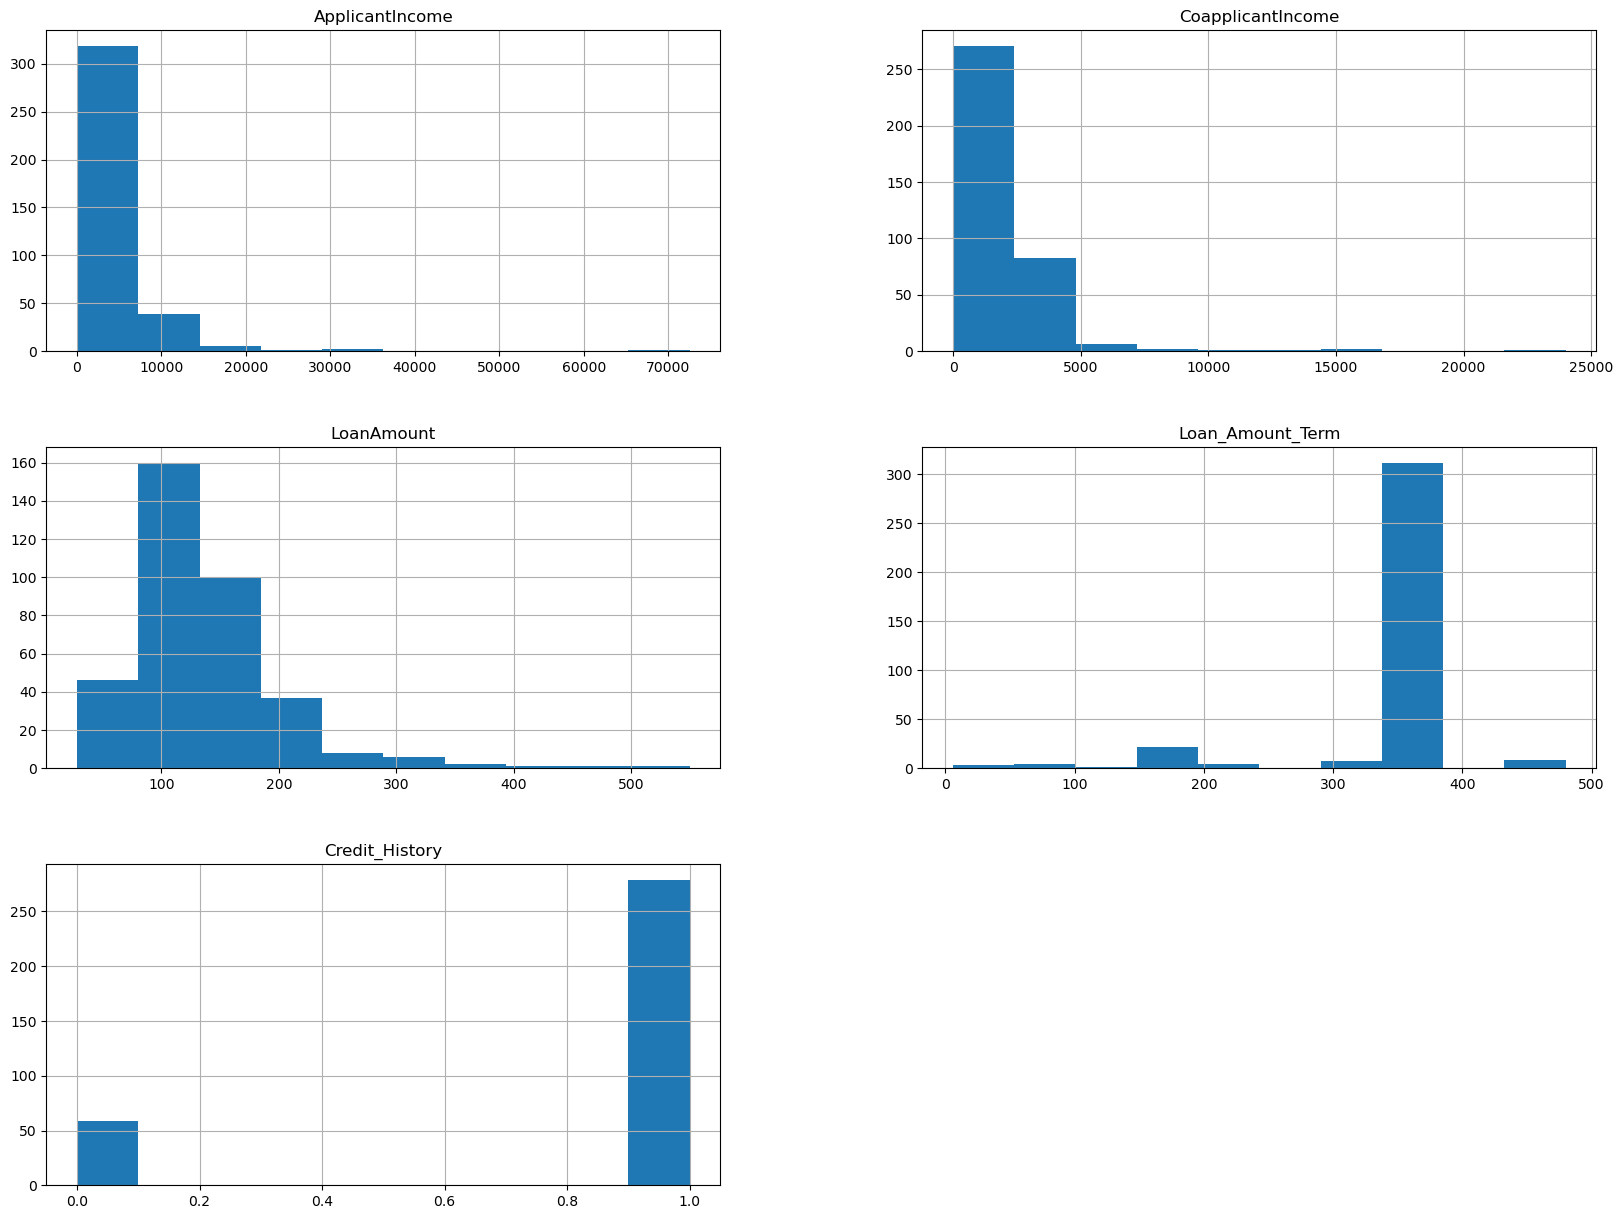

In [69]:
freqgraph = test.select_dtypes(include=['float','int'])
freqgraph.hist(figsize =(20,15));

In [70]:
# Filling null values with median
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].median()) 
test['CoapplicantIncome']=test['CoapplicantIncome'].fillna(test['CoapplicantIncome'].median())

In [71]:
# filling the missing values with mode
for i in ['Gender', 'Dependents','Self_Employed','Credit_History']:
    test[i] = test[i].fillna(test[i].mode()[0])

In [72]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


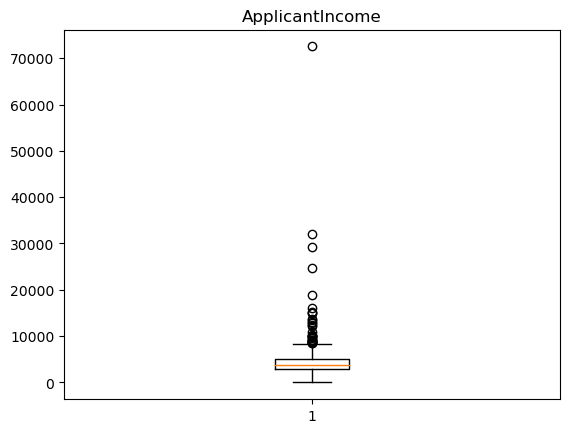

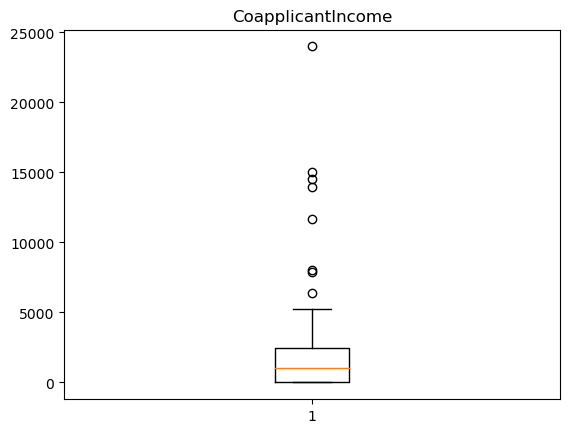

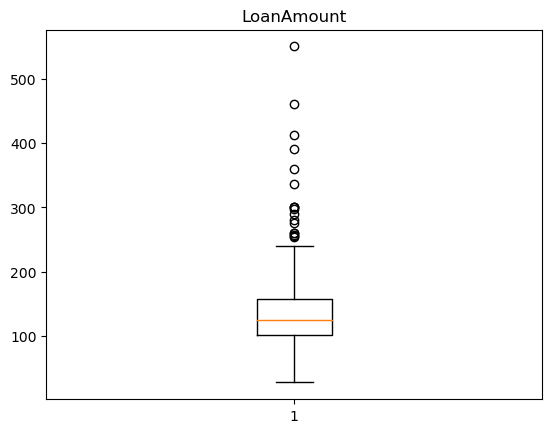

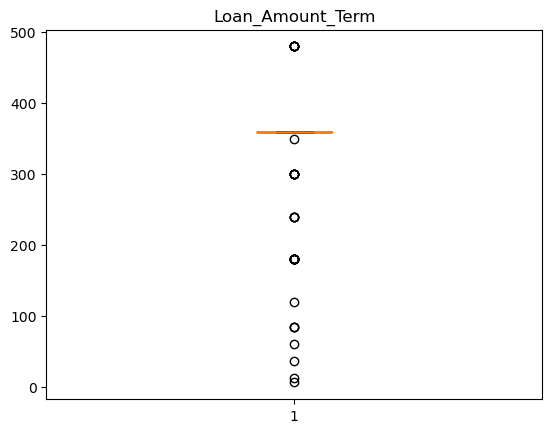

In [73]:
# Outlier detection
#outliers in numerical features
numerical=[features for features in test.columns if test[features].dtypes!="O" and features !='Loan_Status' and  features !='Credit_History']
print(numerical)
for features in numerical:
        plt.boxplot(test[features])
        plt.title(features)
        plt.show()

In [74]:
categorical_features=[features for features in test.columns if test[features].dtypes=="O" and features !='Loan_Status']
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [75]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']: #skewness
    data_skew=test[i].skew()
    print(data_skew)

8.441374954190996
4.257356934477602
2.244600521260248
-2.709536758573826


<AxesSubplot:>

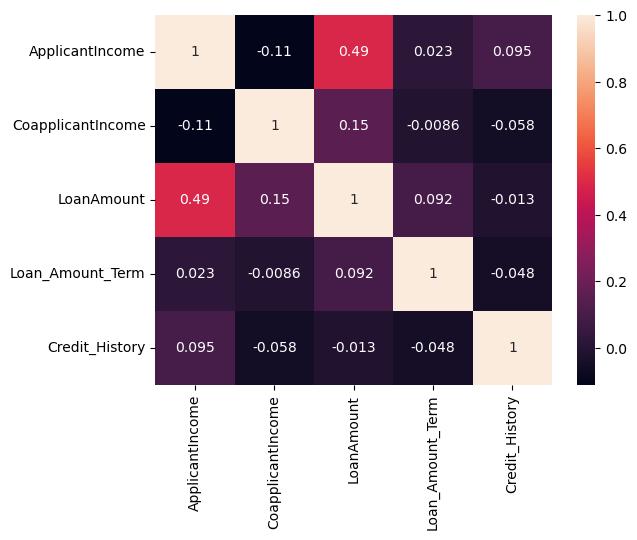

In [76]:
test.corr()
sns.heatmap(test.corr(),annot =True)

In [77]:
data_test=test.drop('Loan_ID',axis=1)# dropping the Loan Id column withall unique value 

In [78]:
for i in ['Self_Employed','Dependents','Self_Employed','Education','Married','Gender','Property_Area']:
    data_test[i]=le.fit_transform(data_test[i])

In [79]:
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [82]:
data_test1=data_test.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1)
data_test2=data_test[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]

In [83]:
data_test1.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [84]:
from sklearn.preprocessing import StandardScaler
stdsclr=StandardScaler()
data_test3=stdsclr.fit_transform(data_test1)

In [85]:
data_test3

array([[ 0.1864605 , -0.67333511, -0.42677996,  0.26602207,  0.4376739 ],
       [-0.35269225, -0.02984821, -0.16395333,  0.26602207,  0.4376739 ],
       [ 0.0396413 ,  0.09884917,  1.18303317,  0.26602207,  0.4376739 ],
       ...,
       [-0.31721094,  0.18164449, -0.16395333,  0.26602207,  0.4376739 ],
       [ 0.0396413 ,  0.353241  ,  0.36169994,  0.26602207,  0.4376739 ],
       [ 0.89608667, -0.67333511, -0.62389994, -2.52163936,  0.4376739 ]])

In [87]:
data_test3=pd.DataFrame(data_test3,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'])

In [88]:
data_test3.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.186461,-0.673335,-0.426780,0.266022,0.437674
1,-0.352692,-0.029848,-0.163953,0.266022,0.437674
2,0.039641,0.098849,1.183033,0.266022,0.437674
3,-0.502774,0.418877,-0.591047,0.266022,0.437674
4,-0.311909,-0.673335,-0.952433,0.266022,0.437674


In [89]:
#concatenating target & encoded columns with scaled columns.
data_test3 =pd.concat([data_test2,data_test3], axis =1)

In [90]:
data_test3.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,0,0,2,0.186461,-0.673335,-0.426780,0.266022,0.437674
1,1,1,1,0,0,2,-0.352692,-0.029848,-0.163953,0.266022,0.437674
2,1,1,2,0,0,2,0.039641,0.098849,1.183033,0.266022,0.437674
3,1,1,2,0,0,2,-0.502774,0.418877,-0.591047,0.266022,0.437674
4,1,0,0,1,0,2,-0.311909,-0.673335,-0.952433,0.266022,0.437674


In [91]:
data_test3.shape

(367, 11)

In [92]:
pred_test = model_logr.predict(data_test3)  #prediction for test data

In [93]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [96]:
# import the submission file which we have to submit on the solution checker.
submission = pd.read_csv(r'file:///C:\Users\SHAKIR\Desktop\New%20folder%20(2)\sample_submission_49d68Cx%20(2).csv')

In [97]:
#We only need the Loan_ID and the corresponding Loan_Status for the final submission. We will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e. pred_test respectively.
submission['Loan_Status']=pred_test

In [98]:
submission['Loan_ID']=test['Loan_ID']

In [99]:
#we need predictions in Y and N. So lets convert 1 and 0 to Y and N.
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [100]:
#convert the submission to .csv format 
pd.DataFrame(submission,columns = ['Loan_ID','Loan_Status']).to_csv('logistic.csv',index=False)

In [102]:
#convert the submission to .csv format 
pd.DataFrame(submission,columns = ['Loan_ID','Loan_Status']).to_csv('logistic.csv',index=False)

In [103]:
log_csv =pd.read_csv('logistic.csv')

In [104]:
log_csv.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


 Model Fine Tuning :
Our Linear Regression Model doesnt need any further tuning, as we've got a good performace scores.